In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from ast import literal_eval

In [2]:
controller_output = Path('output')

In [3]:
low_df = pd.read_csv(controller_output / '100_runs_lowest.csv')
high_df = pd.read_csv(controller_output / '100_runs_highest.csv')
random_df = pd.read_csv(controller_output / '100_runs_random.csv')

In [4]:
for df in [low_df, high_df, random_df]:
    df.loc[~df['predicted_optimal_utility'].isna(), 'rule_costs'] = df.loc[~df['predicted_optimal_utility'].isna(), 'rule_costs'].apply(literal_eval)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='run', y='system_utility', data=low_df, ax=ax, ci=None, label='Lowest Cost Rule')
sns.lineplot(x='run', y='system_utility', data=high_df, ax=ax, ci=None, label='Highest Cost Rule')
sns.lineplot(x='run', y='system_utility', data=random_df, ax=ax, ci=None, label='Random Rule')
ax.set(xlabel='Run', ylabel='System Utility');

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
lowest = sns.lineplot(x='run', y='shop_utility', hue='shop', data=low_df, ci=None, linestyle='dashed', ax=ax, label='Lowest Cost Rule', legend=False)
highest = sns.lineplot(x='run', y='shop_utility', hue='shop', data=high_df, ci=None, linestyle='dotted', ax=ax, label='Highest Cost Rule', legend=False)
random = sns.lineplot(x='run', y='shop_utility', hue='shop', data=random_df, ci=None, ax=ax, label='Random Rule', legend=False)
ax.set(xlabel='Run', ylabel='Shop Utility');
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::10], ['Lowest Cost Rule', 'Highest Cost Rule', 'Random Rule']);

In [83]:
example_shop = low_df.loc[low_df['shop'] == 'mRUBiS #1'].set_index(['run', 'fix_status', 'shop'])

In [145]:
example_shop_sys_utility = example_shop.groupby(level=[0,1,2])['shop_utility'].first()

In [146]:
diffs = example_shop_sys_utility.sort_index(ascending=False, level=[0,1], sort_remaining=False)\
                                .sort_index(level=[0], sort_remaining=False)\
                                .diff(1)

<AxesSubplot:xlabel='run'>

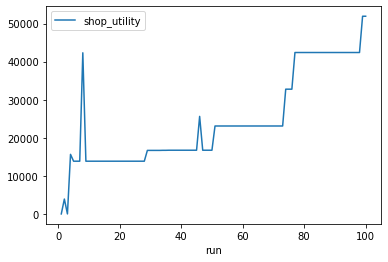

In [147]:
diffs.iloc[1::2]\
     .reset_index()\
     .plot(x='run', y='shop_utility')